# Explore secretion system genes

[KEGG enrichment analysis](5_KEGG_enrichment_of_stable_genes.ipynb) found that genes associated with ribosome, Lipopolysaccharide (outer membrane) biosynthesis, citrate cycle are significantly conserved across strains.
Indeed functions that are essential seem to be significantly conserved across strains as expected.
However, there are also pathways like the secretion systems, which allow for inter-strain warfare, that we’d expect to vary across strains but were found to be conserved (T3SS significant but not T6SS).

This notebook examines the stability score of the genes in the secretion systems to determine if there is a subset of the secretion genes, related to the machinery that is conserved while others, like the secretory proteins, are more variable.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load data and metadata

In [2]:
# Input similarity scores and annotations filenames
# Since the results are similar we only need to look at the scores for one strain type
pao1_similarity_filename = "pao1_core_similarity_associations_final_spell.tsv"

In [3]:
# Import df
pao1_similarity = pd.read_csv(pao1_similarity_filename, sep="\t", index_col=0, header=0)

In [4]:
pao1_similarity.head()

,Name,PA14 homolog id,label,Transcriptional similarity across strains,P-value,pathways present,Related acc genes
PAO1 id,,,,,,,
PA1950,rbsK,PA14_39280,NaN,0.353718,1.962739e-157,['KEGG-Pathway-pae00030: Pentose phosphate pat...,NaN
PA4872,NaN,PA14_64440,NaN,0.381711,4.085891e-185,[],NaN
PA3680,NaN,PA14_16770,NaN,0.381384,8.943350e-185,[],NaN
PA0586,NaN,PA14_07650,most stable,0.542184,0.000000e+00,[],NaN
PA1468,NaN,PA14_45450,NaN,0.365443,1.080005e-168,[],NaN


In [5]:
# Load KEGG pathway data
pao1_pathway_filename = "https://raw.githubusercontent.com/greenelab/adage/7a4eda39d360b224268921dc1f2c14b32788ab16/Node_interpretation/pseudomonas_KEGG_terms.txt"

In [6]:
pao1_pathways = annotations.load_format_KEGG(pao1_pathway_filename)
print(pao1_pathways.shape)
pao1_pathways.head()

(169, 2)


,1,2
0,,
KEGG-Pathway-pae00072: Synthesis and degradation of ketone bodies,10,"{PA3925, PA1999, PA2553, PA2003, PA1736, PA201..."
KEGG-Pathway-pae00071: Fatty acid degradation,32,"{PA3629, PA1187, PA1535, PA1737, PA1748, PA257..."
KEGG-Pathway-pae00903: Limonene and pinene degradation,9,"{PA4899, PA1027, PA3331, PA1737, PA1821, PA342..."
KEGG-Pathway-pae00380: Tryptophan metabolism,27,"{PA4342, PA4613, PA1737, PA2147, PA1748, PA158..."
KEGG-Pathway-pae00900: Terpenoid backbone biosynthesis,16,"{PA3803, PA4043, PA3633, PA3650, PA4669, PA392..."


## Get genes related to secretion pathways

In [7]:
pao1_pathways.loc[
    [
        "KEGG-Module-M00334: Type VI secretion system",
        "KEGG-Module-M00332: Type III secretion system",
        "KEGG-Module-M00335: Sec (secretion) system",
    ]
]

,1,2
0,,
KEGG-Module-M00334: Type VI secretion system,45,"{PA0078, PA1657, PA0090, PA2365, PA1661, PA151..."
KEGG-Module-M00332: Type III secretion system,18,"{PA1696, PA1722, PA1695, PA1694, PA1691, PA172..."
KEGG-Module-M00335: Sec (secretion) system,11,"{PA0373, PA3821, PA3746, PA5568, PA4747, PA382..."


In [8]:
# Get genes related to pathways
T6SS_genes = list(pao1_pathways.loc["KEGG-Module-M00334: Type VI secretion system", 2])
T3SS_genes = list(pao1_pathways.loc["KEGG-Module-M00332: Type III secretion system", 2])
secretion_genes = list(
    pao1_pathways.loc["KEGG-Module-M00335: Sec (secretion) system", 2]
)

In [10]:
# Pull out genes related to T3SS
T6SS_similarity = pao1_similarity.reindex(T6SS_genes)
T3SS_similarity = pao1_similarity.reindex(T3SS_genes)
sec_similarity = pao1_similarity.reindex(secretion_genes)

In [23]:
T6SS_similarity.sort_values(by="Transcriptional similarity across strains")

,Name,PA14 homolog id,label,Transcriptional similarity across strains,P-value,pathways present,Related acc genes
PAO1 id,,,,,,,
PA5266,vgrG6,PA14_69550,least stable,0.155106,3.707870e-30,['KEGG-Pathway-pae03070: Bacterial secretion s...,No accessory genes
PA2373,vgrG3,PA14_33960,NaN,0.249988,5.145750e-77,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA3294,vgrG4a,PA14_21450,NaN,0.317249,2.335780e-125,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA2360,hsiA3,PA14_34140,NaN,0.374110,2.523986e-177,['KEGG-Module-M00334: Type VI secretion system'],NaN
PA3486,vgrG4b,PA14_18985,NaN,0.377424,1.074394e-180,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1662,clpV2,PA14_42980,NaN,0.389164,5.869041e-193,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1511,vgrG2a,PA14_44900,NaN,0.392085,4.347897e-196,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA2685,vgrG4,PA14_29390,NaN,0.393992,3.777662e-198,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA0262,vgrG2b,PA14_03220,NaN,0.397657,3.792902e-202,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN


In [27]:
T3SS_similarity.sort_values(by="Transcriptional similarity across strains")

,Name,PA14 homolog id,label,Transcriptional similarity across strains,P-value,pathways present,Related acc genes
PAO1 id,,,,,,,
PA1693,pscR,PA14_42620,NaN,0.295975,1.316753e-108,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1691,pscT,PA14_42640,NaN,0.417149,2.781907e-224,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1692,NaN,PA14_42630,NaN,0.431850,5.630936e-242,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1701,pcr3,PA14_42520,NaN,0.458613,1.597267e-276,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1725,pscL,PA14_42250,NaN,0.475642,3.599895e-300,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1724,pscK,PA14_42260,NaN,0.494309,0.000000e+00,['KEGG-Module-M00332: Type III secretion system'],NaN
PA1690,pscU,PA14_42660,NaN,0.495239,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA1717,pscD,PA14_42340,most stable,0.511781,0.000000e+00,['KEGG-Module-M00332: Type III secretion system'],NaN
PA1723,pscJ,PA14_42270,most stable,0.525278,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN


In [28]:
sec_similarity.sort_values(by="Transcriptional similarity across strains")

,Name,PA14 homolog id,label,Transcriptional similarity across strains,P-value,pathways present,Related acc genes
PAO1 id,,,,,,,
PA3822,NaN,PA14_14610,NaN,0.375615,7.517323e-179,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA0373,ftsY,PA14_04900,NaN,0.461184,5.229911e-280,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA5128,secB,PA14_67720,NaN,0.482989,8.552419e-311,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA4403,secA,PA14_57220,NaN,0.484336,9.058939e-313,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA4747,secG,PA14_62810,NaN,0.497164,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA3746,ffh,PA14_15960,most stable,0.519051,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA4276,secE,PA14_08695,most stable,0.526990,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA5568,NaN,PA14_73410,most stable,0.538293,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA3821,secD,PA14_14630,most stable,0.594014,0.000000e+00,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN


## Plot

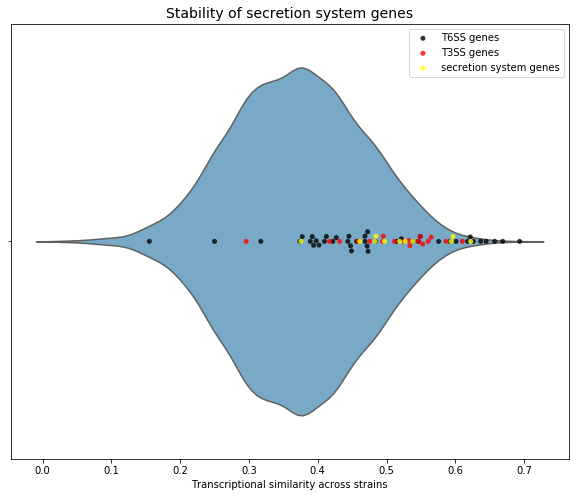

In [32]:
plt.figure(figsize=(10, 8))
sns.violinplot(
    data=pao1_similarity,
    x="Transcriptional similarity across strains",
    palette="Blues",
    inner=None,
)
sns.swarmplot(
    data=T6SS_similarity,
    x="Transcriptional similarity across strains",
    color="k",
    label="T6SS genes",
    alpha=0.8,
)

sns.swarmplot(
    data=T3SS_similarity,
    x="Transcriptional similarity across strains",
    color="r",
    label="T3SS genes",
    alpha=0.8,
)

sns.swarmplot(
    data=sec_similarity,
    x="Transcriptional similarity across strains",
    color="yellow",
    label="secretion system genes",
    alpha=0.8,
)

plt.title("Stability of secretion system genes", fontsize=14)
plt.legend()

We hypothesized that most secretion machinery genes would be conserved but that secreted proteins (i.e. effector proteins) would be less conserved. In general, the effector proteins were not included in the KEGG annotations, which is probably why these secretion systems were found to be highly stable.

There are some low scoring genes found, especially for the T6SS. Based on a manual inspection, these appear to be _vgrG_ genes that do encode some of the effector proteins.